In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("insurance_data.csv")

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA
# WE BASICALLY ASKED 7 QUESTIONS FOR OUR DATASETS FIRST?


In [3]:
#1. How Big is the Dataset ?
print(data.shape)

(1338, 7)


In [4]:
# 2. How Does the Data Look Like?
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
462,62,female,38.095,2,no,northeast,15230.32405
719,58,female,33.440,0,no,northwest,12231.61360
1170,18,male,27.360,1,yes,northeast,17178.68240
1334,18,female,31.920,0,no,northeast,2205.98080
971,34,female,23.560,0,no,northeast,4992.37640
782,51,male,35.970,1,no,southeast,9386.16130
426,38,female,27.265,1,no,northeast,6555.07035
1164,41,female,28.310,1,no,northwest,7153.55390
845,60,female,32.450,0,yes,southeast,45008.95550
179,41,female,33.155,3,no,northeast,8538.28845


In [5]:
# 3. What is the Data Type of Cols?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# 4. Are there any Missing Values?¶
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# 5. How Does the Data Looks Mathematically?
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# 6. Are there any Duplicate Values?
data.duplicated().sum()

1

In [9]:
# 7. How is the Correlation Between Cols?
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Created a correlation between all the features¶

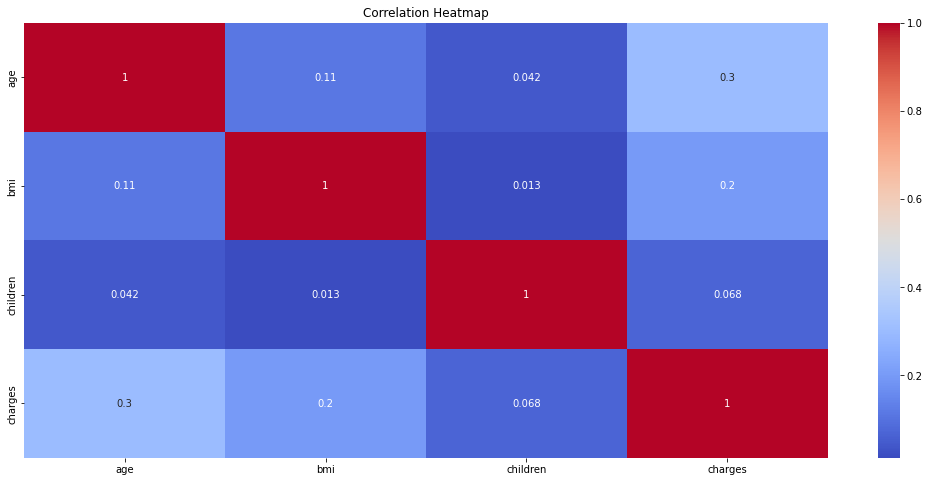

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# There are two types of Data Present in the Dataset.
# Numerical
# Categorical

In [11]:
data_encoded = pd.get_dummies(data, columns=["sex", "smoker", "region"])


In [12]:
data_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


# Define the Features & Target Variable , According to the Problem Statement
# Univariant Analysis of the Input Features
# Bivariant Analysis

In [13]:
from ydata_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Now Separate Independent Variable and Dependent Variable

In [14]:
X = data_encoded.drop("charges", axis=1)
y = data_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train-Test Split

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

# Building the Model

In [16]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Training Accuracy", regressor.score(X_train, y_train))
print("Test Accuracy",regressor.score(X_test, y_test))

Mean Squared Error: 33596915.85136147
R-squared: 0.7835929767120723
Training Accuracy 0.7417255854683333
Test Accuracy 0.7835929767120723


In [18]:
print("1st element is age:\n2nd element is BMI:\n3rd element is children:\n4th element is sex_female:\n5th element is sex_male:\n6th element is smoker_no:\n7th element is smoker_yes:\n8th element is region_northeast:\n9th element is region_northwest:\n10th element is region_southeast:\n11th element is region_southwest")
input_data = []

# Define the number of elements you want in the list
num_elements = 11

# Use a for loop to take input from the user and append it to the list
for i in range(num_elements):
    element = input("Enter element {} of {}: ".format(i + 1, num_elements))
    input_data.append(element)

# Print the list
print("The input values is:", input_data)

# input_data = (18,33.770,0,1,0,0,1,0,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

1st element is age:
2nd element is BMI:
3rd element is children:
4th element is sex_female:
5th element is sex_male:
6th element is smoker_no:
7th element is smoker_yes:
8th element is region_northeast:
9th element is region_northwest:
10th element is region_southeast:
11th element is region_southwest
Enter element 1 of 11: 18
Enter element 2 of 11: 33.770
Enter element 3 of 11: 0
Enter element 4 of 11: 1
Enter element 5 of 11: 0
Enter element 6 of 11: 0
Enter element 7 of 11: 1
Enter element 8 of 11: 0
Enter element 9 of 11: 0
Enter element 10 of 11: 1
Enter element 11 of 11: 0
The list you entered is: ['18', '33.770', '0', '1', '0', '0', '1', '0', '0', '1', '0']
[27071.22369314]
The insurance cost is USD  27071.223693141666


C:\Users\mahim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mahim\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
